In [ ]:
import numpy as np
import nibabel as nib
import glob
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tifffile import imsave
from sklearn.preprocessing import MinMaxScaler
import random
import splitfolders  # or import split_folders


In [ ]:
import tensorflow as tf

# Set the GPU memory limit (in MB)
gpu_memory_limit = 3072  # for example, limit to 4GB

# Restrict TensorFlow to allocate a specific amount of memory on the GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_virtual_device_configuration(
                gpu,
                [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=gpu_memory_limit)]
            )
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [ ]:
scaler = MinMaxScaler()

In [ ]:
TRAIN_DATASET_PATH = "/content/sample_data/BraTS-GLI-00000-000-t2f.nii.gz"


In [ ]:
TRAIN_DATASET_PATH = "/content/sample_data/BraTS-GLI-00000-000-t1n.nii.gz"

In [ ]:
TRAIN_DATASET_PATH = "/content/sample_data/BraTS-GLI-00000-000-t2w.nii.gz"

In [ ]:
TRAIN_DATASET_PATH = "/content/sample_data/BraTS-GLI-00000-000-t1c.nii.gz"

In [ ]:
test_image_flair = nib.load("/content/sample_data/BraTS-GLI-00000-000-t2f.nii.gz").get_fdata()
print(test_image_flair.shape)
print(test_image_flair.max())

(240, 240, 155)
2934.0


In [ ]:
test_image_flair = scaler.fit_transform(test_image_flair.reshape(-1, test_image_flair.shape[-1])).reshape(test_image_flair.shape)
print(test_image_flair.max())
print(test_image_flair.min())

1.0
0.0


In [ ]:
test_image_t1 = nib.load("/content/sample_data/BraTS-GLI-00000-000-t1n.nii.gz").get_fdata()
test_image_t1 = scaler.fit_transform(test_image_t1.reshape(-1, test_image_t1.shape[-1])).reshape(test_image_t1.shape)
print(test_image_t1.max())
print(test_image_t1.min())

1.0
0.0


In [ ]:
test_image_t1c = nib.load("/content/sample_data/BraTS-GLI-00000-000-t1c.nii.gz").get_fdata()
test_image_t1c = scaler.fit_transform(test_image_t1c.reshape(-1, test_image_t1c.shape[-1])).reshape(test_image_t1c.shape)
print(test_image_t1c.max())
print(test_image_t1c.min())

1.0
0.0


In [ ]:
test_image_t2 = nib.load("/content/sample_data/BraTS-GLI-00000-000-t2w.nii.gz").get_fdata()
test_image_t2 = scaler.fit_transform(test_image_t2.reshape(-1, test_image_t2.shape[-1])).reshape(test_image_t2.shape)
print(test_image_t2.max())
print(test_image_t2.min())

1.0
0.0


In [ ]:
test_mask = nib.load("/content/sample_data/BraTS-GLI-00000-000-seg.nii.gz").get_fdata()
test_mask = test_mask.astype(np.uint8)
print(np.unique(test_mask))

[0 1 2 3]


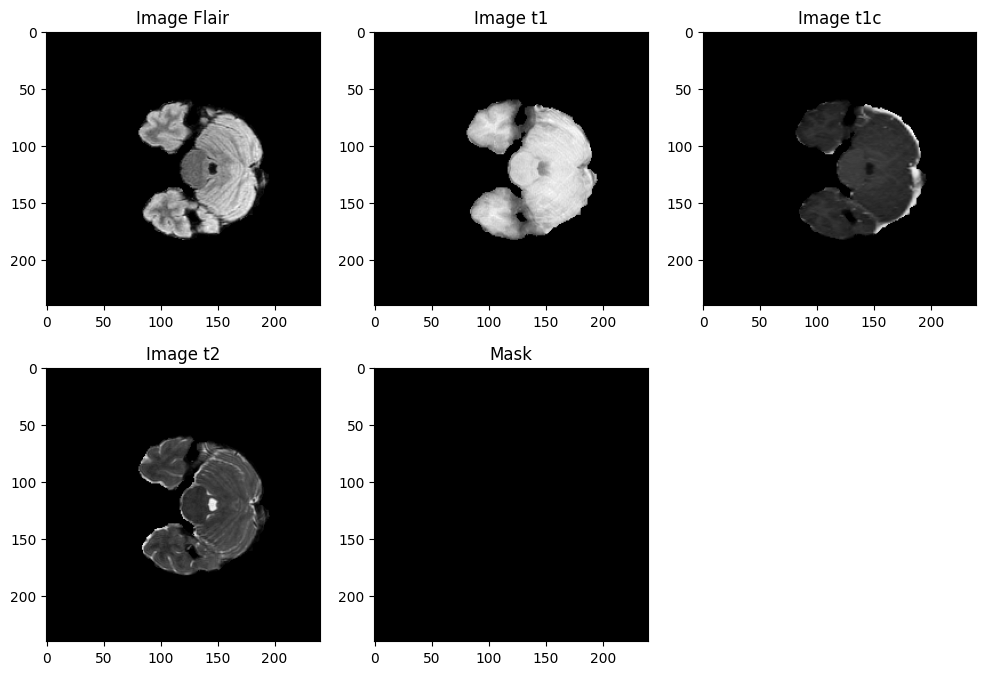

In [ ]:
n_slice = random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12,8))

plt.subplot(231)
plt.imshow(test_image_flair[:,:,n_slice], cmap='gray')
plt.title("Image Flair")

plt.subplot(232)
plt.imshow(test_image_t1[:,:,n_slice], cmap='gray')
plt.title("Image t1")

plt.subplot(233)
plt.imshow(test_image_t1c[:,:,n_slice], cmap='gray')
plt.title("Image t1c")

plt.subplot(234)
plt.imshow(test_image_t2[:,:,n_slice], cmap='gray')
plt.title("Image t2")

plt.subplot(235)
plt.imshow(test_mask[:,:,n_slice], cmap='gray')
plt.title("Mask")

plt.show()

In [ ]:
combined_x = np.stack([test_image_flair, test_image_t1c, test_image_t2], axis=3)

In [ ]:
combined_x.shape

(240, 240, 155, 3)

In [ ]:
combined_x = combined_x[56:184, 56:184, 13:141]
combined_x.shape
test_mask = test_mask[56:184, 56:184, 13:141]
test_mask.shape

(128, 128, 128)

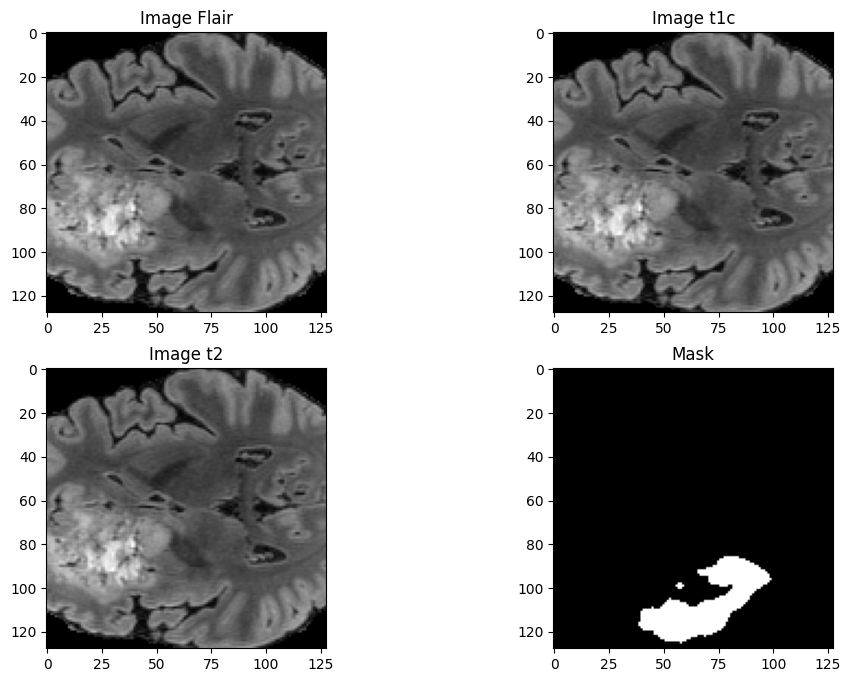

In [ ]:
n_slice = random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12,8))

plt.subplot(221)
plt.imshow(combined_x[:,:,n_slice,0], cmap='gray')
plt.title("Image Flair")

plt.subplot(222)
plt.imshow(combined_x[:,:,n_slice,0], cmap='gray')
plt.title("Image t1c")

plt.subplot(223)
plt.imshow(combined_x[:,:,n_slice,0], cmap='gray')
plt.title("Image t2")

plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice], cmap='gray')
plt.title("Mask")


plt.show()

test_mask = to_categorical(test_mask, num_classes=4)

# Watching the mask in test_image_t2 and a test_mask

In [ ]:
test_image_t2 = nib.load("/content/sample_data/BraTS-GLI-00000-000-t2w.nii.gz").get_fdata()
test_image_t2= test_image_t2.astype(np.uint8)
print(np.unique(test_image_t2))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [ ]:
test_mask = nib.load("/content/sample_data/BraTS-GLI-00000-000-seg.nii.gz").get_fdata()
test_mask = test_mask.astype(np.uint8)
print(np.unique(test_mask))

[0 1 2 3]


# Image lists

In [ ]:
n_slice = random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12,8))

plt.subplot(221)
plt.imshow(combined_x[:,:,n_slice,0], cmap='gray')
plt.title("Image Flair")

plt.subplot(222)
plt.imshow(combined_x[:,:,n_slice,0], cmap='gray')
plt.title("Image t1c")

plt.subplot(223)
plt.imshow(combined_x[:,:,n_slice,0], cmap='gray')
plt.title("Image t2")

plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice], cmap='gray')
plt.title("Mask")


plt.show()

1251
1251
1251
1251
1251


# IMAGES

In [ ]:
for img in range(len(t2_list)):   #Using t1_list as all lists are of same size
    print("Now preparing image and masks number: ", img)

    temp_image_t2=nib.load(t2_list[img]).get_fdata()
    temp_image_t2=scaler.fit_transform(temp_image_t2.reshape(-1, temp_image_t2.shape[-1])).reshape(temp_image_t2.shape)

    temp_image_t1c=nib.load(t1c_list[img]).get_fdata()
    temp_image_t1c=scaler.fit_transform(temp_image_t1c.reshape(-1, temp_image_t1c.shape[-1])).reshape(temp_image_t1c.shape)

    temp_image_flair=nib.load(flair_list[img]).get_fdata()
    temp_image_flair=scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(temp_image_flair.shape)

    temp_mask=nib.load(mask_list[img]).get_fdata()
    temp_mask=temp_mask.astype(np.uint8)
    #print(np.unique(temp_mask))


    temp_combined_images = np.stack([temp_image_flair, temp_image_t1c, temp_image_t2], axis=3)

    #Crop to a size to be divisible by 64 so we can later extract 64x64x64 patches.
    #cropping x, y, and z
    temp_combined_images=temp_combined_images[56:184, 56:184, 13:141]
    temp_mask = temp_mask[56:184, 56:184, 13:141]

    val, counts = np.unique(temp_mask, return_counts=True)

    if (1 - (counts[0]/counts.sum())) > 0.01:  #At least 1% useful volume with labels that are not 0
        print("Save Me")
        temp_mask= to_categorical(temp_mask, num_classes=4)
        np.save('D:\BRATS 2023\input_data_3channels\images\image_'+str(img)+'.npy', temp_combined_images)
        np.save('D:\BRATS 2023\input_data_3channels\masks\mask_'+str(img)+'.npy', temp_mask)

    else:
        print("I am useless")

In [ ]:
import splitfolders  # or import split_folders

input_folder = 'D:\BRATS 2023\input_data_3channels'
output_folder = 'D:\BRATS 2023\input_data_128'
# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.75, .25), group_prefix=None) # default values

In [ ]:
import os
import numpy as np


def load_img(img_dir, img_list):
    images=[]
    for i, image_name in enumerate(img_list):
        if (image_name.split('.')[1] == 'npy'):

            image = np.load(img_dir+image_name)

            images.append(image)
    images = np.array(images)

    return(images)




def imageLoader(img_dir, img_list, mask_dir, mask_list, batch_size):

    L = len(img_list)

    #keras needs the generator infinite, so we will use while true
    while True:

        batch_start = 0
        batch_end = batch_size

        while batch_start < L:
            limit = min(batch_end, L)

            X = load_img(img_dir, img_list[batch_start:limit])
            Y = load_img(mask_dir, mask_list[batch_start:limit])

            yield (X,Y) #a tuple with two numpy arrays with batch_size samples

            batch_start += batch_size
            batch_end += batch_size


863
863


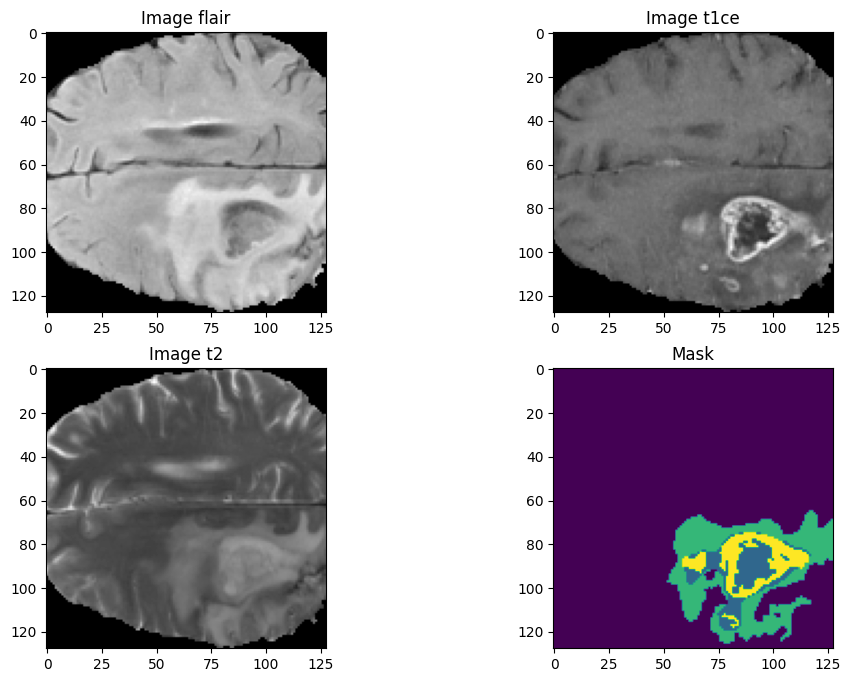

In [ ]:
from matplotlib import pyplot as plt
import random

train_img_dir = "D:\BRATS 2023\input_data_128/train/images/"
train_mask_dir = "D:\BRATS 2023\input_data_128/train/masks/"
train_img_list=sorted(os.listdir(train_img_dir))
train_mask_list = sorted(os.listdir(train_mask_dir))


print(len(train_img_list))
print(len(train_mask_list))

batch_size = 2

train_img_datagen = imageLoader(train_img_dir, train_img_list,
                                train_mask_dir, train_mask_list, batch_size)

#Verify generator.... In python 3 next() is renamed as __next__()
img, msk = train_img_datagen.__next__()


img_num = random.randint(0,img.shape[0]-1)
test_img=img[img_num]
test_mask=msk[img_num]
test_mask=np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv3D, MaxPooling3D, concatenate, Conv3DTranspose, BatchNormalization, Dropout, Lambda
from keras.optimizers import Adam
from keras.metrics import MeanIoU

kernel_initializer =  'he_uniform' #Try others if you want


################################################################
################################################################
def simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS, num_classes):
#Build the model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH, IMG_CHANNELS))
    s = inputs

    #Contraction path
    c1 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c1)
    p1 = MaxPooling3D((2, 2, 2))(c1)

    c2 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c2)
    p2 = MaxPooling3D((2, 2, 2))(c2)

    c3 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c3)
    p3 = MaxPooling3D((2, 2, 2))(c3)

    c4 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c4)
    p4 = MaxPooling3D(pool_size=(2, 2, 2))(c4)

    c5 = Conv3D(256, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv3D(256, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c5)

    #Expansive path
    u6 = Conv3DTranspose(128, (2, 2, 2), strides=(2, 2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv3D(128, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c6)

    u7 = Conv3DTranspose(64, (2, 2, 2), strides=(2, 2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv3D(64, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c7)

    u8 = Conv3DTranspose(32, (2, 2, 2), strides=(2, 2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv3D(32, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c8)

    u9 = Conv3DTranspose(16, (2, 2, 2), strides=(2, 2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1])
    c9 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv3D(16, (3, 3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c9)

    outputs = Conv3D(num_classes, (1, 1, 1), activation='softmax')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    #compile model outside of this function to make it flexible.
    model.summary()

    return model

#Test if everything is working ok.
model = simple_unet_model(128, 128, 128, 3, 4)
print(model.input_shape)
print(model.output_shape)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                28, 3)]                                                           
                                                                                                  
 conv3d (Conv3D)                (None, 128, 128, 12  1312        ['input_1[0][0]']                
                                8, 16)                                                            
                                                                                                  
 dropout (Dropout)              (None, 128, 128, 12  0           ['conv3d[0][0]']                 
                                8, 16)                                                        

                                                                                                  
 conv3d_12 (Conv3D)             (None, 32, 32, 32,   221248      ['concatenate_1[0][0]']          
                                64)                                                               
                                                                                                  
 dropout_6 (Dropout)            (None, 32, 32, 32,   0           ['conv3d_12[0][0]']              
                                64)                                                               
                                                                                                  
 conv3d_13 (Conv3D)             (None, 32, 32, 32,   110656      ['dropout_6[0][0]']              
                                64)                                                               
                                                                                                  
 conv3d_tr

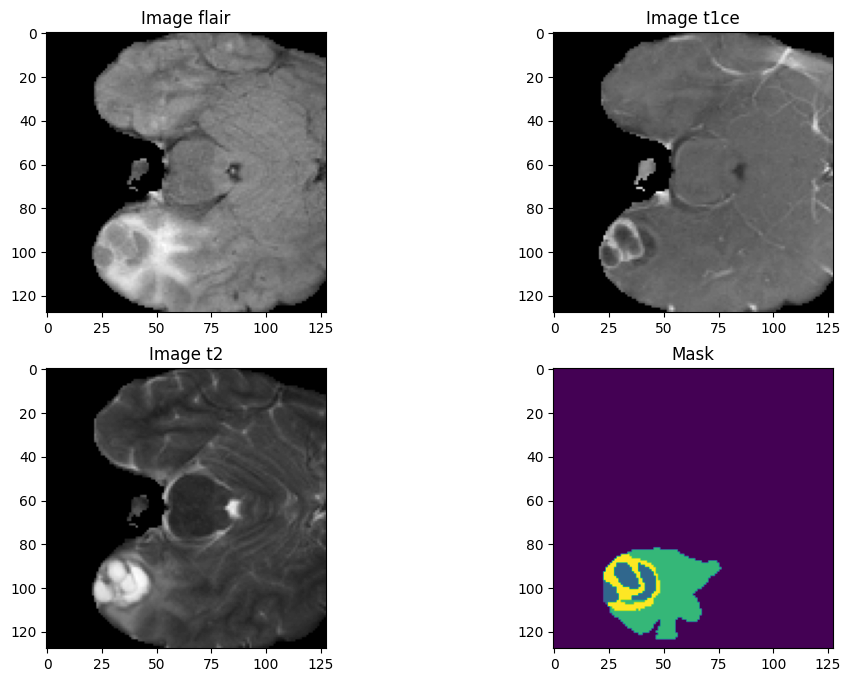

In [ ]:
import os
import numpy as np
import tensorflow as tf
import keras
from matplotlib import pyplot as plt
import glob
import random



####################################################
train_img_dir = "D:\\BRATS 2023\\input_data_128\\train\\images\\"
train_mask_dir = "D:\\BRATS 2023\\input_data_128\\train\\masks\\"

img_list = sorted(os.listdir(train_img_dir))
msk_list = sorted(os.listdir(train_mask_dir))

num_images = len(os.listdir(train_img_dir))

img_num = random.randint(0,num_images-1)
test_img = np.load(train_img_dir+img_list[img_num])
test_mask = np.load(train_mask_dir+msk_list[img_num])
test_mask = np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

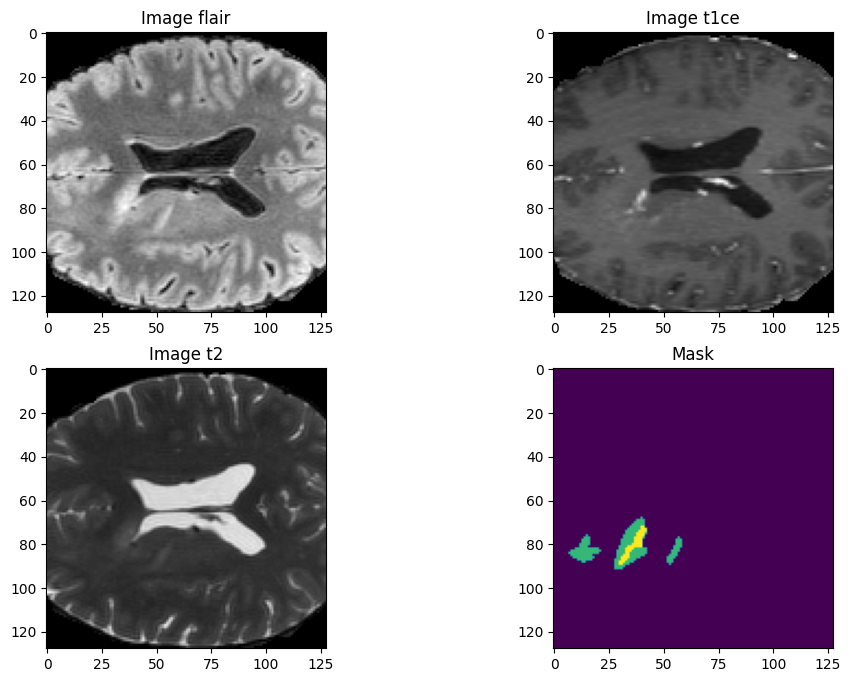

In [ ]:
#Define the image generators for training and validation

train_img_dir = "D:\\BRATS 2023\\input_data_128\\train\\images\\"
train_mask_dir = "D:\\BRATS 2023\\input_data_128\\train\\masks\\"

val_img_dir = "D:\\BRATS 2023\\input_data_128\\val\\images\\"
val_mask_dir = "D:\\BRATS 2023\\input_data_128\\val\\masks\\"

train_img_list= sorted(os.listdir(train_img_dir))
train_mask_list = sorted(os.listdir(train_mask_dir))

val_img_list=sorted(os.listdir(val_img_dir))
val_mask_list = sorted(os.listdir(val_mask_dir))
##################################

########################################################################
batch_size = 1

train_img_datagen = imageLoader(train_img_dir, train_img_list,
                                train_mask_dir, train_mask_list, batch_size)

val_img_datagen = imageLoader(val_img_dir, val_img_list,
                                val_mask_dir, val_mask_list, batch_size)

#Verify generator.... In python 3 next() is renamed as __next__()
img, msk = train_img_datagen.__next__()

img_num = random.randint(0,img.shape[0]-1)
test_img=img[img_num]
test_mask=msk[img_num]
test_mask=np.argmax(test_mask, axis=3)

n_slice=random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(test_img[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(test_img[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(test_img[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

In [ ]:
###########################################################################
#Define loss, metrics and optimizer to be used for training
wt0, wt1, wt2, wt3 = 0.25,0.25,0.25,0.25
import segmentation_models_3D as sm
dice_loss = sm.losses.DiceLoss(class_weights=np.array([wt0, wt1, wt2, wt3]))
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

metrics = ['accuracy', sm.metrics.IOUScore(threshold=0.5)]

LR = 0.0001
optim = keras.optimizers.Adam(LR)

Segmentation Models: using `tf.keras` framework.


In [ ]:
#Fit the model

steps_per_epoch = len(train_img_list)//batch_size
val_steps_per_epoch = len(val_img_list)//batch_size


# from  simple_3d_unet import simple_unet_model

model = simple_unet_model(IMG_HEIGHT=128,
                          IMG_WIDTH=128,
                          IMG_DEPTH=128,
                          IMG_CHANNELS=3,
                          num_classes=4)

model.compile(optimizer = optim, loss=total_loss, metrics=metrics)
print(model.summary())

print(model.input_shape)
print(model.output_shape)

history=model.fit(train_img_datagen,
          steps_per_epoch=steps_per_epoch,
          epochs=100,
          verbose=1,
          validation_data=val_img_datagen,
          validation_steps=val_steps_per_epoch,
          )

# model.save('brats_3d.hdf5')

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                28, 3)]                                                           
                                                                                                  
 conv3d_19 (Conv3D)             (None, 128, 128, 12  1312        ['input_2[0][0]']                
                                8, 16)                                                            
                                                                                                  
 dropout_9 (Dropout)            (None, 128, 128, 12  0           ['conv3d_19[0][0]']              
                                8, 16)                                                      

                                                                                                  
 conv3d_31 (Conv3D)             (None, 32, 32, 32,   221248      ['concatenate_5[0][0]']          
                                64)                                                               
                                                                                                  
 dropout_15 (Dropout)           (None, 32, 32, 32,   0           ['conv3d_31[0][0]']              
                                64)                                                               
                                                                                                  
 conv3d_32 (Conv3D)             (None, 32, 32, 32,   110656      ['dropout_15[0][0]']             
                                64)                                                               
                                                                                                  
 conv3d_tr

                                64)                                                               
                                                                                                  
 max_pooling3d_6 (MaxPooling3D)  (None, 16, 16, 16,   0          ['conv3d_24[0][0]']              
                                64)                                                               
                                                                                                  
 conv3d_25 (Conv3D)             (None, 16, 16, 16,   221312      ['max_pooling3d_6[0][0]']        
                                128)                                                              
                                                                                                  
 dropout_12 (Dropout)           (None, 16, 16, 16,   0           ['conv3d_25[0][0]']              
                                128)                                                              
          

 conv3d_36 (Conv3D)             (None, 128, 128, 12  6928        ['dropout_17[0][0]']             
                                8, 16)                                                            
                                                                                                  
 conv3d_37 (Conv3D)             (None, 128, 128, 12  68          ['conv3d_36[0][0]']              
                                8, 4)                                                             
                                                                                                  
Total params: 5,645,828
Trainable params: 5,645,828
Non-trainable params: 0
__________________________________________________________________________________________________
None
(None, 128, 128, 128, 3)
(None, 128, 128, 128, 4)
Epoch 1/100
863/863 [==============================] - 1030s 1s/step - loss: 0.9256 - accuracy: 0.9340 - iou_score: 0.2831 - val_loss: 0.9148 - val_accuracy: 0.8710 - val_iou_s

863/863 [==============================] - 1016s 1s/step - loss: 0.7834 - accuracy: 0.9915 - iou_score: 0.8137 - val_loss: 0.8041 - val_accuracy: 0.9821 - val_iou_score: 0.7322
Epoch 40/100
863/863 [==============================] - 1016s 1s/step - loss: 0.7832 - accuracy: 0.9916 - iou_score: 0.8151 - val_loss: 0.8015 - val_accuracy: 0.9850 - val_iou_score: 0.7420
Epoch 41/100
863/863 [==============================] - 1018s 1s/step - loss: 0.7826 - accuracy: 0.9917 - iou_score: 0.8172 - val_loss: 0.7995 - val_accuracy: 0.9866 - val_iou_score: 0.7498
Epoch 42/100
863/863 [==============================] - 1024s 1s/step - loss: 0.7829 - accuracy: 0.9916 - iou_score: 0.8167 - val_loss: 0.8002 - val_accuracy: 0.9866 - val_iou_score: 0.7478
Epoch 43/100
863/863 [==============================] - 1017s 1s/step - loss: 0.7824 - accuracy: 0.9918 - iou_score: 0.8197 - val_loss: 0.8030 - val_accuracy: 0.9829 - val_iou_score: 0.7346
Epoch 44/100
863/863 [==============================] - 1013s 1

863/863 [==============================] - 1023s 1s/step - loss: 0.7759 - accuracy: 0.9937 - iou_score: 0.8529 - val_loss: 0.7968 - val_accuracy: 0.9881 - val_iou_score: 0.7633
Epoch 83/100
863/863 [==============================] - 1016s 1s/step - loss: 0.7761 - accuracy: 0.9936 - iou_score: 0.8515 - val_loss: 0.7964 - val_accuracy: 0.9884 - val_iou_score: 0.7622
Epoch 84/100
863/863 [==============================] - 1018s 1s/step - loss: 0.7759 - accuracy: 0.9936 - iou_score: 0.8520 - val_loss: 0.7977 - val_accuracy: 0.9875 - val_iou_score: 0.7580
Epoch 85/100
863/863 [==============================] - 1015s 1s/step - loss: 0.7769 - accuracy: 0.9934 - iou_score: 0.8468 - val_loss: 0.7969 - val_accuracy: 0.9880 - val_iou_score: 0.7599
Epoch 86/100
863/863 [==============================] - 1021s 1s/step - loss: 0.7761 - accuracy: 0.9936 - iou_score: 0.8519 - val_loss: 0.7972 - val_accuracy: 0.9878 - val_iou_score: 0.7580
Epoch 87/100
863/863 [==============================] - 1014s 1

In [ ]:
model.save('brats_3d_100epoch.hdf5')

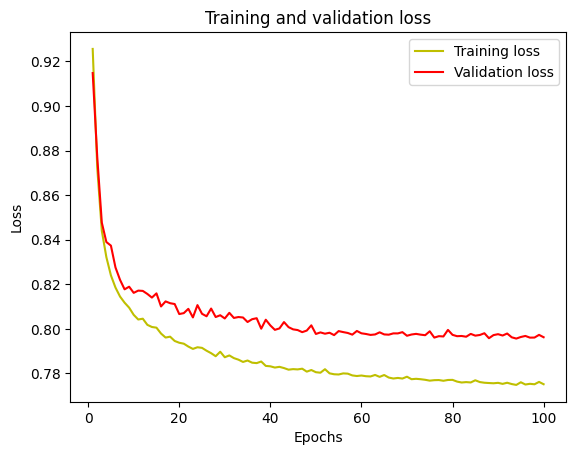

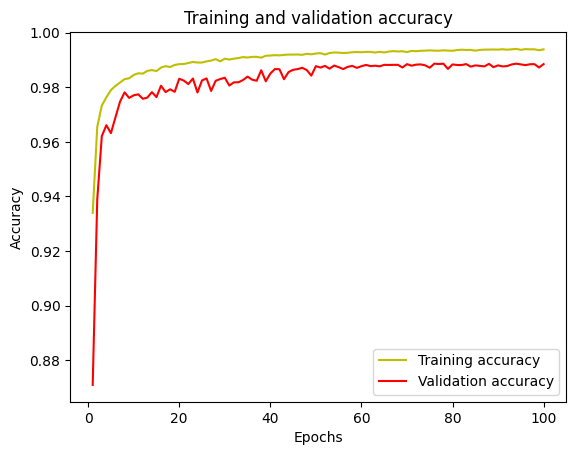

In [ ]:
#plot the training and validation IoU and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

save_path = 'C:\\Users\\ashiq\\Desktop\\outputs\\train_val_loss.png'

plt.savefig(save_path)
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

save_path = 'C:\\Users\\ashiq\\Desktop\\outputs\\train_val_acc.png'

plt.savefig(save_path)
plt.show()

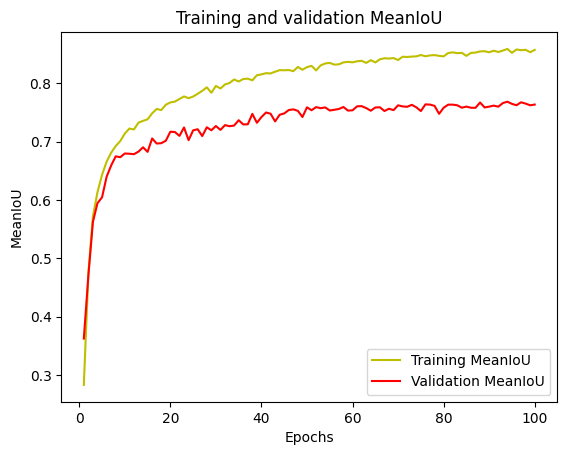

In [ ]:
mean_iou = history.history['iou_score']
val_mean_iou = history.history['val_iou_score']
epochs = range(1, len(mean_iou) + 1)

plt.plot(epochs, mean_iou, 'y', label='Training MeanIoU')
plt.plot(epochs, val_mean_iou, 'r', label='Validation MeanIoU')
plt.title('Training and validation MeanIoU')
plt.xlabel('Epochs')
plt.ylabel('MeanIoU')
plt.legend()
save_path = '/content/drive/MyDrive/breast-cancer-cell-segmentation/Images'

plt.savefig(save_path)
plt.show()

1/1 [==============================] - 0s 26ms/step


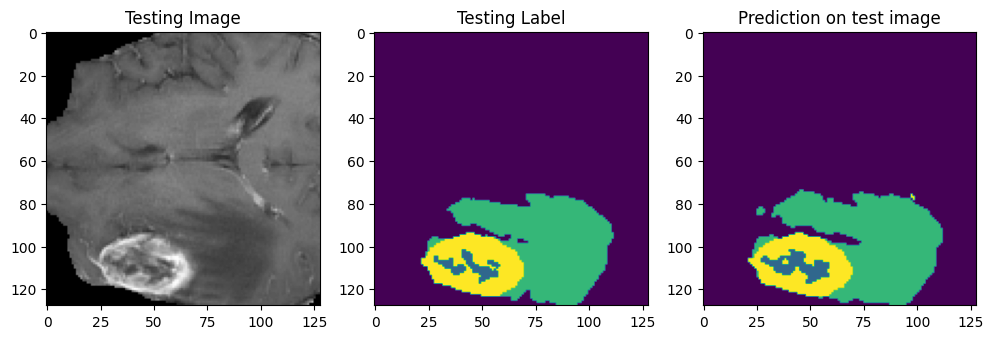

1/1 [==============================] - 0s 20ms/step


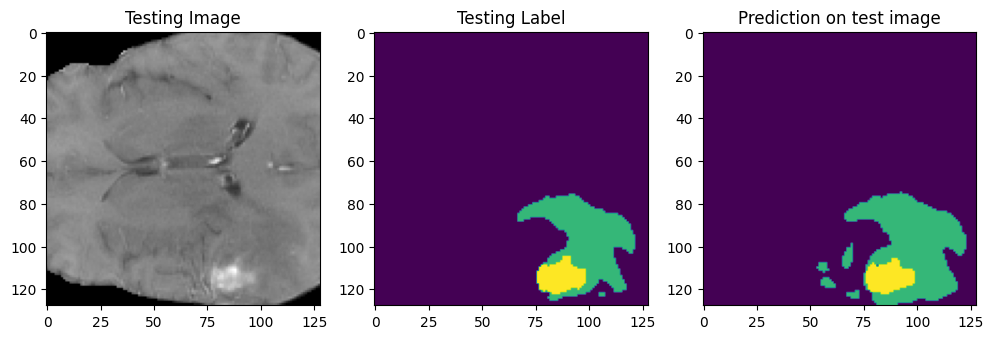

1/1 [==============================] - 0s 22ms/step


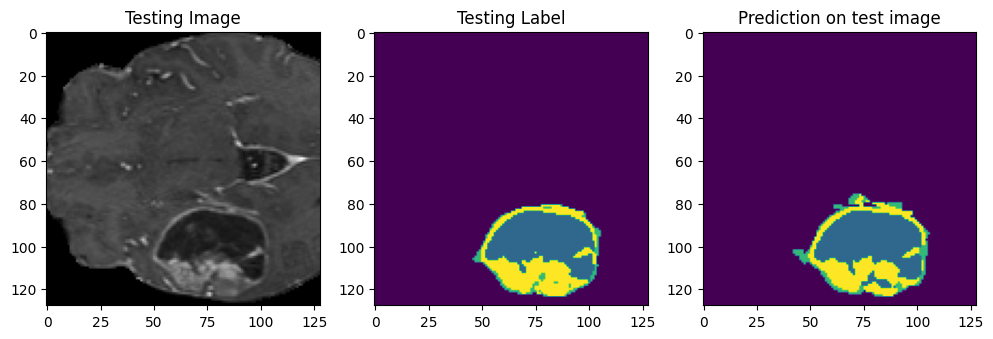

In [ ]:
#############################################
#Predict on a few test images, one at a time
#Try images:
img_num = 402

#601

test_img = np.load("D:\\BRATS 2023\\input_data_128\\val\\images\\image_"+str(img_num)+".npy")

test_mask = np.load("D:\\BRATS 2023\\input_data_128\\val\\masks\\mask_"+str(img_num)+".npy")
test_mask_argmax=np.argmax(test_mask, axis=3)

test_img_input = np.expand_dims(test_img, axis=0)
test_prediction = model.predict(test_img_input)
test_prediction_argmax=np.argmax(test_prediction, axis=4)[0,:,:,:]



#Plot individual slices from test predictions for verification
from matplotlib import pyplot as plt
import random

#n_slice=random.randint(0, test_prediction_argmax.shape[2])
n_slice = 55
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,n_slice,1], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(test_mask_argmax[:,:,n_slice])
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(test_prediction_argmax[:,:, n_slice])
save_path = 'C:\\Users\\ashiq\\Desktop\\outputs\\402_pred.png'

plt.savefig(save_path)
plt.show()
##############################################################################################################

img_num = 34

test_img = np.load("D:\\BRATS 2023\\input_data_128\\val\\images\\image_"+str(img_num)+".npy")

test_mask = np.load("D:\\BRATS 2023\\input_data_128\\val\\masks\\mask_"+str(img_num)+".npy")
test_mask_argmax=np.argmax(test_mask, axis=3)

test_img_input = np.expand_dims(test_img, axis=0)
test_prediction = model.predict(test_img_input)
test_prediction_argmax=np.argmax(test_prediction, axis=4)[0,:,:,:]



#Plot individual slices from test predictions for verification
from matplotlib import pyplot as plt
import random

#n_slice=random.randint(0, test_prediction_argmax.shape[2])
n_slice = 55
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,n_slice,1], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(test_mask_argmax[:,:,n_slice])
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(test_prediction_argmax[:,:, n_slice])
save_path = '/content/drive/MyDrive/breast-cancer-cell-segmentation/Images'

plt.savefig(save_path)
plt.show()
#########################################################################################################################

img_num = 247

test_img = np.load("D:\\BRATS 2023\\input_data_128\\val\\images\\image_"+str(img_num)+".npy")

test_mask = np.load("D:\\BRATS 2023\\input_data_128\\val\\masks\\mask_"+str(img_num)+".npy")
test_mask_argmax=np.argmax(test_mask, axis=3)

test_img_input = np.expand_dims(test_img, axis=0)
test_prediction = model.predict(test_img_input)
test_prediction_argmax=np.argmax(test_prediction, axis=4)[0,:,:,:]



#Plot individual slices from test predictions for verification
from matplotlib import pyplot as plt
import random

#n_slice=random.randint(0, test_prediction_argmax.shape[2])
n_slice = 55
plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,n_slice,1], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(test_mask_argmax[:,:,n_slice])
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(test_prediction_argmax[:,:, n_slice])
save_path = '/content/drive/MyDrive/breast-cancer-cell-segmentation/Images'

plt.savefig(save_path)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
